In [1]:
#importando bibliotecas necessarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#trazendo nosso csv para um dataframe do pandas
dados_df = pd.read_csv('fortal_dados_climaticos.csv', sep=';', encoding='utf-8', low_memory = False)

In [ ]:
#tratamento de dados -> necesario para o python endenda o que esta os
#tipos de dados que iremos utilizar
#display(dados_df)
dados_df['Data'] = pd.to_datetime(dados_df['Data'], dayfirst=True, errors='coerce')
dados_df = dados_df.dropna()
display(dados_df)

In [4]:
#lista de colinas numericos
colunas_numericas = [
"Temp. Ins. (C)", "Temp. Max. (C)", "Temp. Min. (C)", "Umi. Ins. (%)",
"Umi. Max. (%)", "Umi. Min. (%)", "Pto Orvalho Ins. (C)", "Pto Orvalho Max. (C)",
"Pto Orvalho Min. (C)", "Pressao Ins. (hPa)", "Pressao Max. (hPa)",
"Pressao Min. (hPa)", "Vel. Vento (m/s)", "Dir. Vento (m/s)", "Raj. Vento (m/s)",
"Radiacao (KJ/m²)", "Chuva (mm)"]

In [5]:
#converte as benditas virgulas (,) em ponto(.)
for col in colunas_numericas:
    #troca a virgula pelo ponto
    dados_df[col] = dados_df[col].astype(str).str.replace(',','.', regex=False)
    #converte a string que representa valores reais em numerico (float)
    dados_df[col] = pd.to_numeric(dados_df[col], errors='coerce')

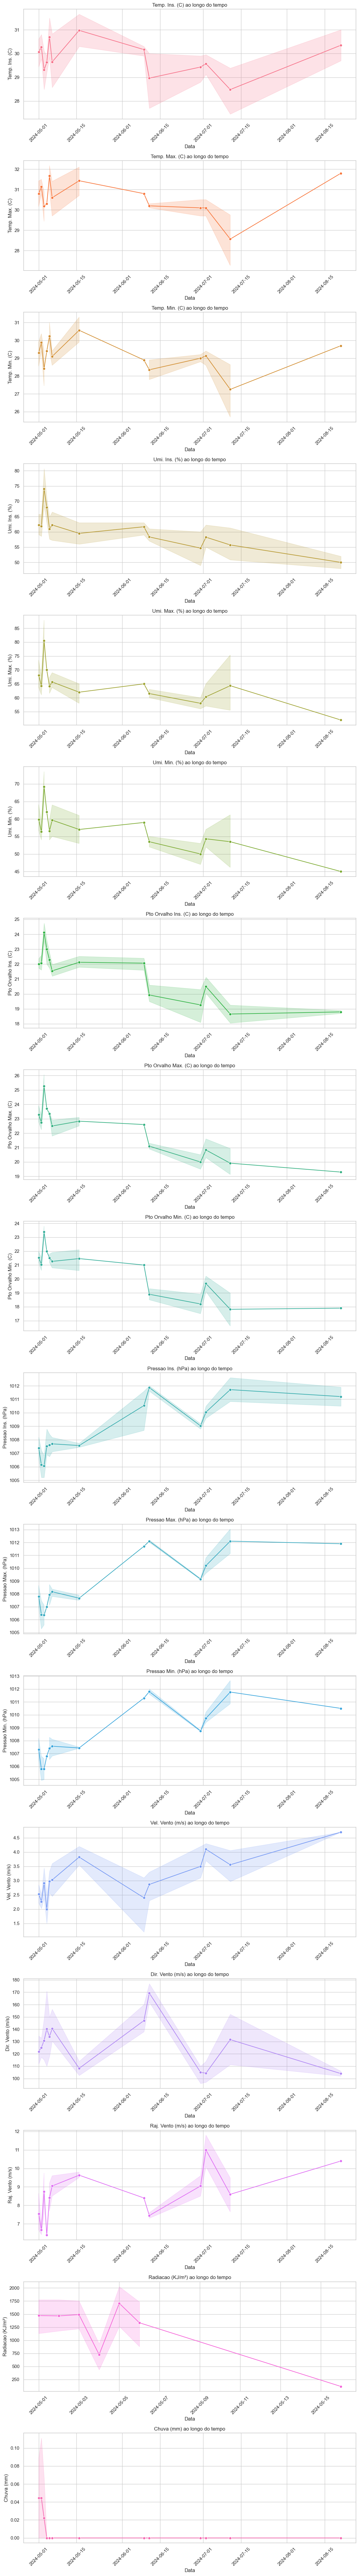

In [6]:
#plantando Tudo...
#configura o stylo do grafico
sns.set(style='whitegrid')
#cria uma paleta de cores com estilo 'husl', com uma cor diferente para cada coluna numericas
colors = sns.color_palette('husl', len(colunas_numericas))
#cria uma figura com varios subgrafico (subplots) dispostas em uma coluna (1 por linha).
#o figsize ajusta o tamanho da imagem final proporcionamente ao numero do grafico
fig, axes = plt.subplots(len(colunas_numericas), 1, figsize=(12, 5 * len(colunas_numericas)))


for i, col in enumerate(colunas_numericas):
    #gerando um grafico de linha (lineplot)para a variavel col ao longo da coluna de datas (dados_df)
    #usa um dos eixos (axes[i]) e aplica uma cor distinta
    #adicona marcador em cada ponto da linha (marker='o')
    sns.lineplot(x=dados_df['Data'], y=dados_df[col], ax=axes[i], color=colors[i], marker='o')
    #define o titulo e os rotulos dos eixos
    axes[i].set_title(f'{col} ao longo do tempo')
    axes[i].set_xlabel('Data')
    axes[i].set_ylabel(col)
    #Gera as ratulas do x para 45º para melhora a leitura
    axes[i].tick_params(axis='x', rotation=45)


#ajusta o layaut para evitar sobreposiçao
plt.tight_layout()

#mostra os graficos
plt.show()